# Banknote Authentication using Machine Learning Algorithms

When you visit a bank to deposit cash, the cashier inserts banknotes into a system that can determine if they are real or not. This is a classification problem where we are given some input data and we have to classify the input into one of the several predefined categories. Rule-based as well as statistical techniques are commonly used for solving classification problems. Machine learning algorithms fall in the category of statistical techniques.


To identify whether the given note is real or not we need to have the dataset of real as well as the fake notes of different features so that we can train a model for testing the new data. We got the data from UCI Machine Learning Repositry. 

### Importing the required libraries
We have imported numpy,pandas,seborn libraries.

In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns

### Loading the dataset
We use read_csv() function from pandas library, which reads the dataset in csv format.

In [45]:
banknote_dataset = pd.read_csv('https://raw.githubusercontent.com/Kuntal-G/Machine-Learning/master/R-machine-learning/data/banknote-authentication.csv')

### Analysing the dataset
Let's now analyse the dataset.

The "head()" function returns the first five rows of the dataset as shown below:

In [46]:
banknote_dataset.head()

,variance,skew,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


The "head()" function returns the first five rows of the dataset as shown above.

In [47]:
banknote_dataset.describe()

,variance,skew,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


The output shows the statistical information of the dataset. 

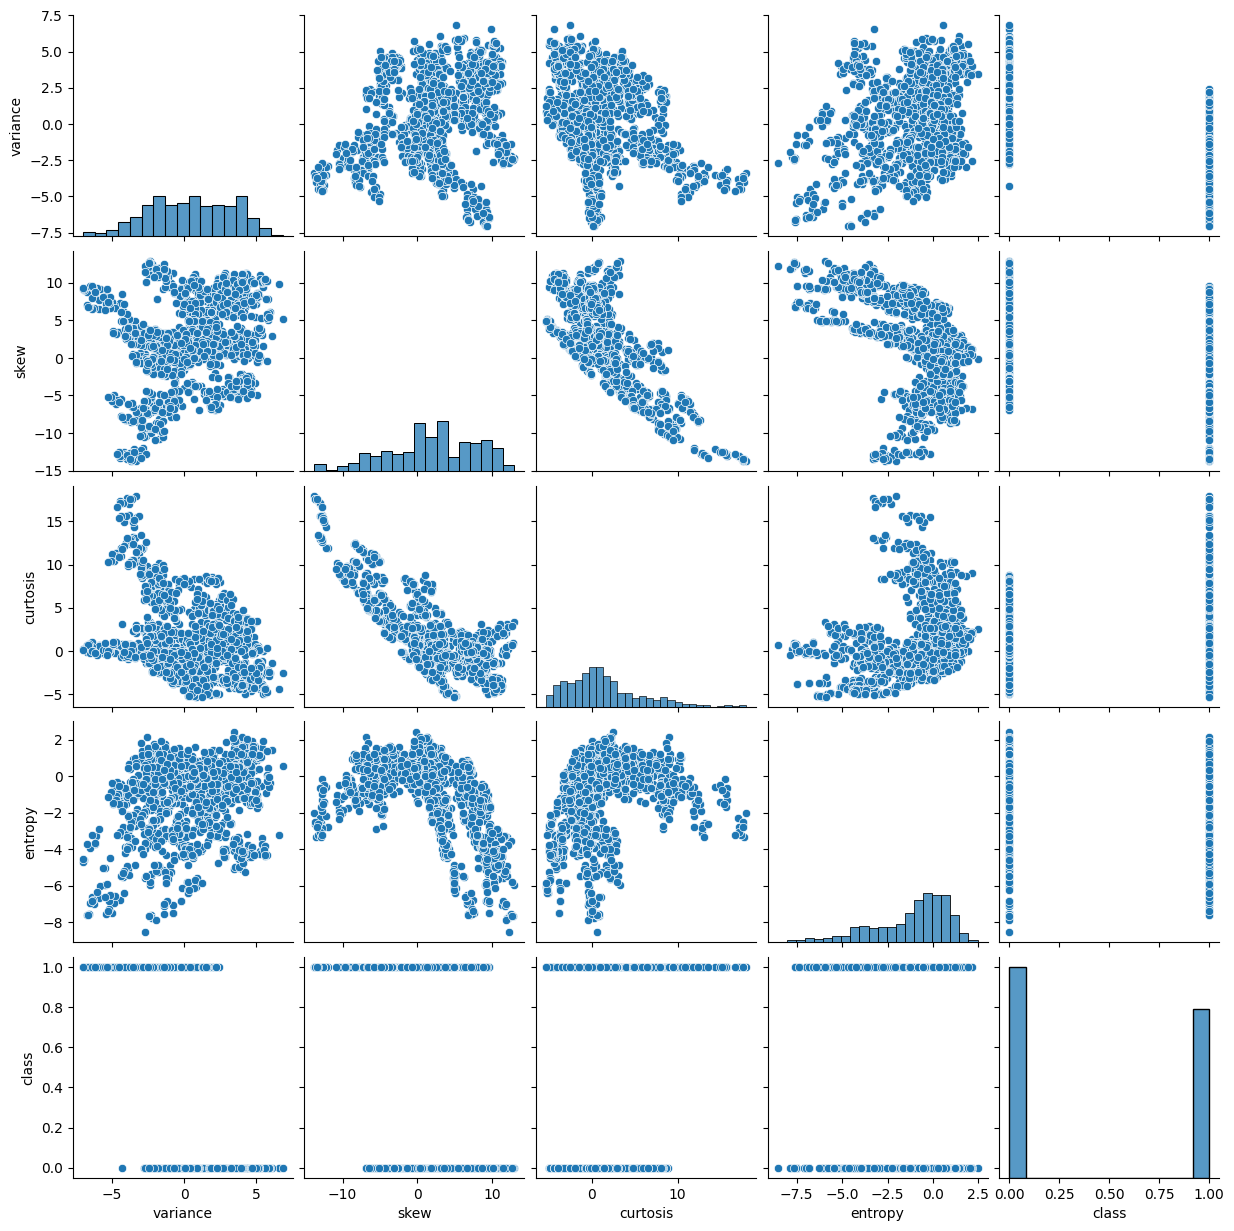

In [48]:
sns.pairplot(banknote_dataset)

We used the “pairplot()” function from the Seaborn library. The function takes dataset as a parameter and plots a graph that contains relationships between all the features in the dataset as shown above. 

### Data processing
Now lets divide the dataset into features and labes.The label means the output class or output category. In our dataset, variance, skew, curtosis, and entropy are features whereas the class column contains the label. The following script divides data into features and labels sets.

In [49]:
dataset_features = banknote_dataset.iloc[:, 0:4].values 

dataset_labels = banknote_dataset.iloc[:, 4].values 


The "iloc" function takes the index that we want to filter from our dataset,in the first line we filtered column 0 to column 3 that contain our feature set. In the second row, we only filtered records from column four which contains the labels (class).

Now lets divide the dataset into train dataset and test dataset. We use training dataset to train the machine learining algorithms and we prredict the results in test dataset.

For train and test split we import train_test_split() function from sklearn.model_selection module. The function takes features set as a first parameter, and the label set as the second parameter. we use "test_size" which corresponds to the percentage of the dataset reserved for testing.

In [50]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21) 

### Random Forest Algorithm

To train the random forest algorithm, we used the “RandomForestClassifier” from the “sklearn.ensemble” library. We need to create an object of the “RandomForestClassifier” class and then call the “fit()” method. The “fit()” method is used to train machine learning algorithms.  The training feature set is passed as the first parameter, while the training label set is passed as the second parameter to the “fit()” method. 

In [51]:
from sklearn.ensemble import RandomForestClassifier as rfc
rfc_object = rfc(n_estimators=200, random_state=0) 
rfc_object.fit(train_features, train_labels) 

RandomForestClassifier(n_estimators=200, random_state=0)

After training the algorithm,  we performed predictions on the test set. To make predictions, the “predict()” method is used. The records to be predicted are passed as parameters to the “predict()” method.

In [52]:
predicted_labels = rfc_object.predict(test_features) 

The “predicted_labels” variable now contains predicted predictions for our test set. To evaluate the performance of our trained algorithm, we need to compare the predicted output with the actual output or actual labels.
To evaluate the performance of our predictions we have metrics like precision, recall, f1-score, support. We get these metrics from Python’s Scikit Learn library.

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(test_labels, predicted_labels)) 
print(confusion_matrix(test_labels, predicted_labels)) 
print(accuracy_score(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

[[152   1]
 [  0 122]]
0.9963636363636363


The "classification_report()" function returns the values for precision,recall and F1. The method takes actual labels as first parameter and the predicted labels as the second parameter. Similarly, the "confusion_matrix()" and the "accuracy_score()" methods return the confusion matrix and the prediction accuracy for our algorithm. 

From the output it is evident that the random forest algorithm performed brilliantly with 99.63% accuracy and only 1 wrong prediction.

### Support Vector Machine
To train supporter vector machine, we used the SVC class from the “sklearn.svm” module. Like random forest, we need to call the “fit()” and “predict()” methods to fit the algorithm and train our data on the algorithm.

In [54]:
from sklearn.svm import SVC as svc
svc_object = svc(kernel='poly', degree=8) 
svc_object.fit(train_features, train_labels)
predicted_labels = svc_object.predict(test_features) 

In [55]:
print(classification_report(test_labels, predicted_labels)) 
print(confusion_matrix(test_labels, predicted_labels)) 
print(accuracy_score(test_labels, predicted_labels))  

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       153
           1       0.71      1.00      0.83       122

    accuracy                           0.81       275
   macro avg       0.85      0.83      0.81       275
weighted avg       0.87      0.81      0.81       275

[[102  51]
 [  0 122]]
0.8145454545454546


The output shows that SVM’s prediction accuracy for banknote authentication is 81.45% with 51 misclassifications.

### Logistic Regression
To train logistic regression we used the “LogisticRegression” class from the “sklearn.linear_mode” module and the rest of the training process are same as that we followed in above methods.

In [56]:
from sklearn.linear_model import LogisticRegression
lr_object = LogisticRegression() 
lr_object.fit(train_features, train_labels)
predicted_labels = lr_object.predict(test_features)  
print(classification_report(test_labels, predicted_labels)) 
print(confusion_matrix(test_labels, predicted_labels)) 
print(accuracy_score(test_labels, predicted_labels)) 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       153
           1       0.98      0.99      0.98       122

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[150   3]
 [  1 121]]
0.9854545454545455


The output showed an accuracy of 98.54% with 3 misclassifications which is better than SVM but still worse than the random forest.

### Conclusion 
Banknote authentication is an important task. It is difficult to manually detect fake bank notes. Machine learning algorithms can help in this regard.We explained how we solved the problem of banknote authentication using machine learning techniques. We compared three different algorithms in terms of performance and concluded that the Random Forest algorithms is the best algorithm for banknote authentication with an accuracy of 99.63%.

 
 